<h2> How to add a field to an existing AWOT instance

In [1]:
# Load the needed packages
import os
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

import awot
import awot
from awot.graph import FlightLevel, RadarVerticalPlot, MicrophysicalVerticalPlot

%matplotlib inline

<b>Supply input data and plotting characteristics. In this case we'll use a file from the OWLeS project and corrected field of velocity data using sounding data.</b>

In [2]:
file1 = "WCR.OWLES13.20131215.225944_234806.up-down.nc"
#file = "WCR.TEST14.20140618.200302_201559.up.nc"
wcrf1 = os.path.join("/Users/guy/data/king_air/owles2013/wcr", file1)

file2 = "W-CORRECTED.WCR.OWLES13.20131215.225944_234806.up-down.nc"
wcrf2 = os.path.join("/Users/guy/data/king_air/owles2013/wcr/", file2)

start_time = "2013-12-16 01:25:00"
end_time = "2013-12-16 01:30:00"

# Set the project name
Project="OWLeS"

#OWLES
altmin, altmax = 0., 3000.

refmin, refmax = -50., 30.
#velmin, velmax = -16., 16. # Nyquist
velmin, velmax = -3., 3. # Nyquist

<b>Read in the radar data</b>

In [3]:
wcr = awot.io.read_wcr2(fname=wcrf1)

height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


<b>Read a variable from another file and add it to the AWOT dictionary. A mask of invalid data is automatically applied. Additional masking can be accomplished by setting the <i>mask_value</i> keyword.</b>

In [4]:
nc = Dataset(wcrf2)
velcor = nc.variables['Velocity_cor_2']
awot.util.add_dict_to_awot_fields(wcr, 'velocity_corrected', data=velcor[:],
                                 units=velcor.units, longname=velcor.long_name, stdname="Corrected velocity")

print(wcr['fields']['velocity']['data'].shape, wcr['fields']['velocity_corrected']['data'].shape)
print(np.ma.min(wcr['fields']['velocity_corrected']['data']), np.ma.max(wcr['fields']['velocity_corrected']['data']))

((14388, 379), (14388, 379))
(-16.568499, 19.136526)


In [5]:
print(wcr.keys())
print("Reflectivity Min/Max = %f / %f \n"
      "Velocity Min/Max = %f / %f \n"
      "Altitude Min/Max = %f / %f \n"
      "Height Min/Max = %f / %f \n"
      "Surface Min/Max = %f / %f \n"%(
        wcr['fields']['reflectivity']['data'].min(),wcr['fields']['reflectivity']['data'].max(),
        wcr['fields']['velocity']['data'].min(),wcr['fields']['velocity']['data'].max(),
        wcr['altitude']['data'].min(), wcr['altitude']['data'].max(),
        wcr['height']['data'].min(), wcr['height']['data'].max(),
        wcr['surface']['data'].min(), wcr['surface']['data'].max()))

['fields', 'tas', 'ground_speed', 'aircraft_wind', 'reflectivity_minimum', 'data_format', 'longitude', 'height', 'project', 'platform', 'flight_number', 'height_ldr', 'surface', 'aspect', 'time', 'latitude', 'altitude', 'height_zdr', 'beam_vector', 'metadata']
Reflectivity Min/Max = -52.312874 / 49.270596 
Velocity Min/Max = -15.640082 / 15.023235 
Altitude Min/Max = 1663.263550 / 3158.159668 
Height Min/Max = -19.123535 / 5657.890137 
Surface Min/Max = -19.123535 / 191.136230 



<b>Make a vertical time series plot of reflectivity and velocity fields</b>

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


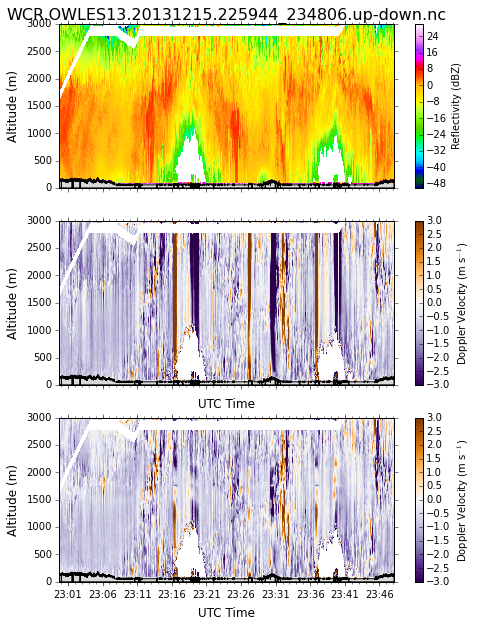

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.5,10), sharex=True)


wcr_vp= RadarVerticalPlot(wcr)

wcr_vp.time_height_image('reflectivity', ax=ax1, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
                         vmin=refmin, vmax=refmax,
                         fill_surface=True,
                         cb_label=r'Reflectivity (dBZ)',
                         height_min=altmin, height_max=altmax, title=file1,
                         ylab=r'Altitude (m)', ylabFontSize=12)
              
wcr_vp.time_height_image('velocity', ax=ax2, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
                         vmin=velmin, vmax=velmax,
                         fill_surface=True,
                         cmap="PuOr_r",
                         cb_label=r'Doppler Velocity (m s$^{-1}$)',
                         height_min=altmin, height_max=altmax,
                         ylab=r'Altitude (m)', ylabFontSize=12,
                         xlab='UTC Time', xlabFontSize=12)
              
wcr_vp.time_height_image('velocity_corrected', ax=ax3, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
                         vmin=velmin, vmax=velmax,
                         fill_surface=True,
                         cmap="PuOr_r",
                         cb_label=r'Doppler Velocity (m s$^{-1}$)',
                         height_min=altmin, height_max=altmax,
                         ylab=r'Altitude (m)', ylabFontSize=12,
                         xlab='UTC Time', xlabFontSize=12)

(379, 61) (379, 61) (60, 378)


/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


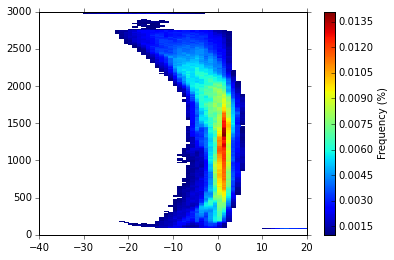

In [6]:
#tas2D, Ht2D = np.meshgrid(wcr['tas']['data'][:], wcr['height']['data'][:])
Ht2D, tas2D = np.meshgrid(wcr['height']['data'][:], wcr['tas']['data'][:])

figC, axC = plt.subplots(1, 1)

awot.graph.plot_bivariate_frequency(wcr['fields']['reflectivity']['data'].ravel(), Ht2D.ravel(),
#awot.graph.plot_bivariate_frequency(Ht2D.ravel(),wcr['fields']['reflectivity']['data'].ravel(),
                              xbinsminmax=(-40., 20.), ybinsminmax=(0., 3000.), nbinsx=61, nbinsy=379,
                              mask_below=0.00001, plot_colorbar=True, plot_percent=True, ax=axC, fig=figC)

#tas2D.shape, Ht2D.shape, wcr['fields']['reflectivity']['data'].shape, wcr['height']['data'].shape

/Users/guy/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:286: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins
/Users/guy/anaconda/lib/python2.7/site-packages/awot-0.2.8-py2.7.egg/awot/graph/common.py:620: RuntimeWarning: invalid value encountered in less


(379, 61) (379, 61) (379, 60)
(379, 51) (379, 51) (379, 50)
(14388, 379)


/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


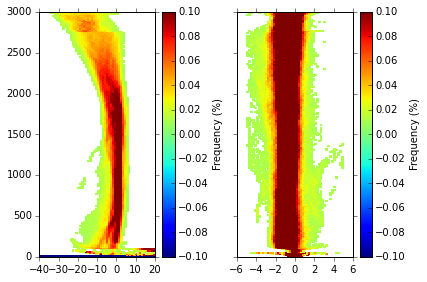

In [7]:
figC, (axZ, axW) = plt.subplots(1, 2, sharey=True)

awot.graph.plot_cfad(wcr['fields']['reflectivity']['data'][:], wcr['height']['data'][:],
                    xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, y_min=0., y_max=3000., ax=axZ)
awot.graph.plot_cfad(wcr['fields']['velocity']['data'][:], wcr['height']['data'][:],
                    xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, y_min=0., y_max=3000., ax=axW)
figC.tight_layout()
print(wcr['fields']['reflectivity']['data'].shape)